<a href="https://colab.research.google.com/github/sayakpaul/Adventures-in-TensorFlow-Lite/blob/master/Boundless_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References
* [Boundless: Generative Adversarial Networks for Image Extension](https://arxiv.org/pdf/1908.07007.pdf)
* https://www.tensorflow.org/hub/tutorials/boundless


In [1]:
!pip install -q tf-nightly

     |████████████████████████████████| 400.3MB 42kB/s 
     |████████████████████████████████| 12.2MB 41.2MB/s 
     |████████████████████████████████| 471kB 55.1MB/s 
     |████████████████████████████████| 4.0MB 55.8MB/s 
ERROR: tensorflow 2.4.0 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0-dev20201220


In [17]:
from PIL import Image

import time
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [10]:
# Reference: https://www.tensorflow.org/hub/tutorials/boundless

def preprocess_image(image_path):
    pil_image = Image.open(image_path)
    width, height = pil_image.size
    # crop to make the image square
    pil_image = pil_image.crop((0, 0, height, height))
    pil_image = pil_image.resize((257, 257), Image.ANTIALIAS)
    image_unscaled = np.array(pil_image)
    image_np = np.expand_dims(
        image_unscaled.astype(np.float32) / 255., axis=0)
    return image_np

def visualize_output_comparison(img_original, img_masked, img_filled):
  plt.figure(figsize=(24, 12))
  plt.subplot(131)
  plt.imshow((np.squeeze(img_original)))
  plt.title("Original", fontsize=24)
  plt.axis('off')
  plt.subplot(132)
  plt.imshow((np.squeeze(img_masked)))
  plt.title("Masked", fontsize=24)
  plt.axis('off')
  plt.subplot(133)
  plt.imshow((np.squeeze(img_filled)))
  plt.title("Generated", fontsize=24)
  plt.axis('off')
  plt.show()

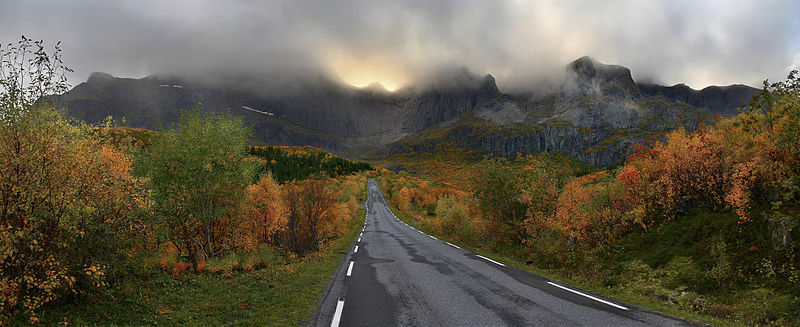

In [5]:
!wget -q -O test_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Nusfjord_road%2C_2010_09.jpg/800px-Nusfjord_road%2C_2010_09.jpg
Image.open("test_image.jpg")

In [6]:
#@title Select model variant to convert
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']
model_handle_map = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1', 
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

model_handle = model_handle_map[model_name]

In [8]:
#@title Convert to TensorFlow Lite
precision = 'dr' # @param ['dr', 'fp16']

# Load the original model
model = hub.load(model_handle)
concrete_function = model.signatures['default']

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_function])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Serialize the model
filename = f'boundless_tflite_{precision}.tflite' 
open(filename, 'wb').write(tflite_model)
print('Model size is %f MBs.' % (len(tflite_model) / 1024 / 1024.0))

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
to_proto not supported in EAGER mode.


Model size is 13.346222 MBs.


The original model size is **124.66 MB** (refer [here](https://tfhub.dev/google/boundless/quarter/1)). 

In [11]:
input_img = preprocess_image("test_image.jpg")

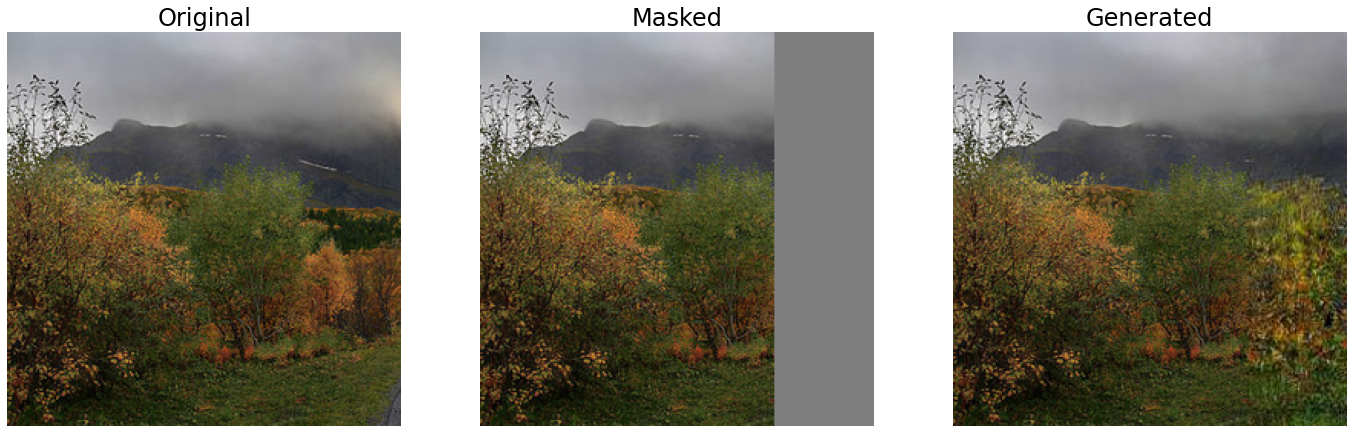

In [12]:
result = model.signatures['default'](tf.constant(input_img))
generated_image =  result['default']
masked_image = result['masked_image']

visualize_output_comparison(input_img, masked_image, generated_image)

In [22]:
interpreter = tf.lite.Interpreter(model_path=f'boundless_tflite_{precision}.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'Placeholder',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([ -1, 257, 257,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [24]:
output_details

[{'dtype': numpy.float32,
  'index': 570,
  'name': 'mul_1',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([ -1, 257, 257,   3], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 251,
  'name': 'mul_2',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([ -1, 257, 257,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [25]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], input_img)
start = time.time()
interpreter.invoke()
print(f"Inference took: {time.time()-start} seconds")

Inference took: 1.2542507648468018 seconds


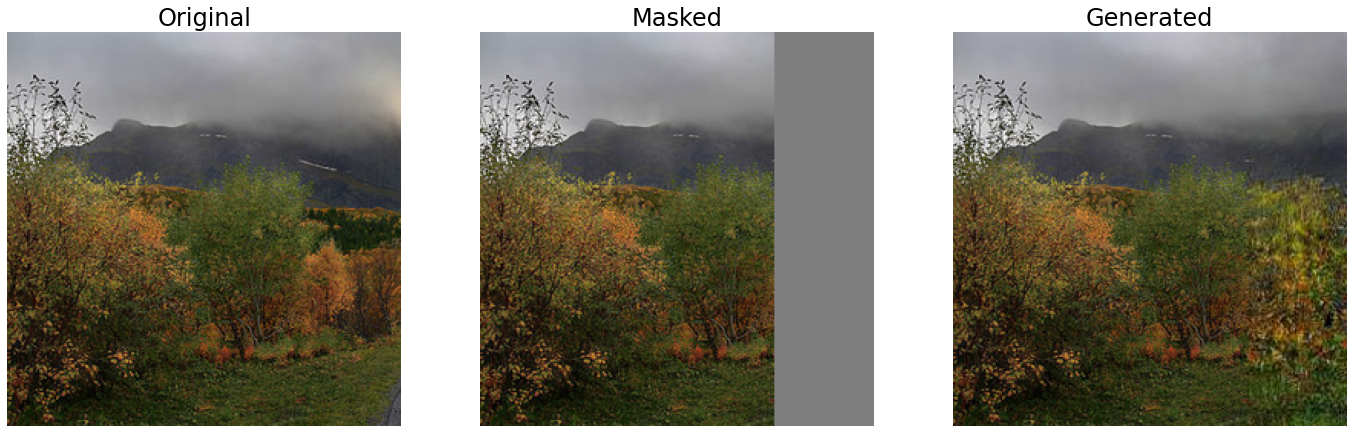

In [28]:
masked_image = interpreter.tensor(interpreter.get_output_details()[1]['index'])()
generated_image = interpreter.tensor(interpreter.get_output_details()[0]['index'])()
visualize_output_comparison(input_img, masked_image, generated_image)

**WIP**